In [5]:
!pip install --upgrade --quiet  ctransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 23.9 MB/s eta 0:00:00


In [6]:
!pip install langchain_community langchain -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.5/807.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 10.5 MB/s eta 0:00:00


In [7]:
from langchain_community.llms import CTransformers
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

config={'max_new_tokens': 100,
                              'temperature': 0.05,
                              'context_length': 500, 'stream': True,'repetition_penalty':2}
llm = CTransformers(model='TheBloke/Llama-2-7B-GGML',callbacks=[StreamingStdOutCallbackHandler()], model_file='llama-2-7b.ggmlv3.q5_0.bin',config=config)

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

llama-2-7b.ggmlv3.q5_0.bin:   0%|          | 0.00/4.63G [00:00<?, ?B/s]

# **LANGCHAIN**

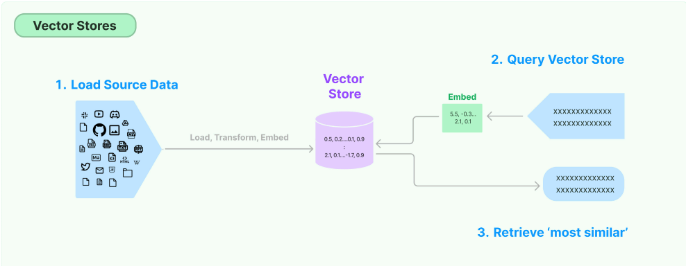

In [8]:
!pip install langchain -q

## **Synthetic data generation**

In [ ]:
import csv
import random

# Function to calculate depression severity based on severity score
def calculate_severity(severity_score):
    if severity_score <= 4:
        return "none"
    elif severity_score <= 9:
        return "mild"
    elif severity_score <= 14:
        return "moderate"
    elif severity_score <= 19:
        return "moderately severe"
    else:
        return "severe"

# Function to generate random conversation summary based on provided questions and generate severity score
def generate_conversation_summary():
    questions = [
        "Little interest or pleasure in doing things?",
        "Feeling down, depressed, or hopeless?",
        "Trouble falling or staying asleep, or sleeping too much?",
        "Feeling tired or having little energy?",
        "Poor appetite or overeating?",
        "Feeling bad about yourself - or that you are a failure or have let yourself or your family down?",
        "Trouble concentrating on things, such as reading the newspaper or watching television?",
        "Moving or speaking so slowly that other people could have noticed? Or the opposite - being so fidgety or restless that you have been moving around a lot more than usual?",
        "Thoughts that you would be better off dead, or of hurting yourself in some way?"
    ]

    # Generate severity scores for each response
    severity_scores = [random.randint(0, 3) for _ in range(len(questions))]
    severity_score = sum(severity_scores)
    severity = calculate_severity(severity_score)

    # Generate conversation summary
    conversation = [
        f"{question} {['Not at all', 'Several days', 'More than half the days', 'Nearly every day'][response]}"
        for question, response in zip(questions, severity_scores)
    ]
    summary = '\n'.join(conversation)
    summary += f"\nDepression Severity: {severity_score} ({severity})"

    return severity_score, summary.strip()

# Function to generate random therapist recommendation based on conversation summary and depression severity
def generate_recommendation(conversation_summary, severity_score):
    severity = calculate_severity(severity_score)

    # Randomly select recommendation based on content of conversation summary and severity
    recommendations = [
        f"Based on your conversation and the severity of your depression ({severity}), it might be beneficial to seek support from a mental health professional or counselor.",
        f"Considering the severity of your depression ({severity}), engaging in regular physical activity and maintaining a balanced diet can help improve your overall well-being.",
        f"Given the severity of your depression ({severity}), practicing mindfulness and relaxation techniques may assist in managing stress and improving mental health."
    ]
    return random.choice(recommendations)

# Generate synthetic dataset
def generate_dataset(num_samples, output_file):
    with open(output_file, 'w', newline='') as csvfile:
        fieldnames = ['Conversation_summary', 'Recommendation']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for _ in range(num_samples):
            severity_score, conversation_summary = generate_conversation_summary()
            recommendation = generate_recommendation(conversation_summary, severity_score)
            writer.writerow({'Conversation_summary': conversation_summary, 'Recommendation': recommendation})

# Generate 1000 samples and save to CSV file
generate_dataset(1000, 'synthetic_data.csv')


## **CSV Loading**

In [10]:
from langchain.document_loaders import CSVLoader

loader = CSVLoader("./synthetic_data.csv", encoding="windows-1252")
csv_documents = loader.load()
len(csv_documents)

1000

## **Splitting chunks using text Splitter**

In [11]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
docs_splits = text_splitter.split_documents(csv_documents)

## **Persisting data in Chroma DB**

## **Install**

In [12]:
!pip install chromadb -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 4

## **Get the Chroma Client**

In [13]:
import chromadb
chroma_client = chromadb.Client()

In [14]:
!pip install sentence-transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 2.9 MB/s eta 0:00:00


In [15]:
from langchain_community.vectorstores import Chroma
from langchain.embeddings import SentenceTransformerEmbeddings

embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

vectordb = Chroma.from_documents(docs_splits,embeddings,persist_directory='./data')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## **Parent Document Retriever**

When splitting documents for retrieval, there are often conflicting desires:

You may want to have small documents, so that their embeddings can most accurately reflect their meaning. If too long, then the embeddings can lose meaning.
You want to have long enough documents that the context of each chunk is retained.
The ParentDocumentRetriever strikes that balance by splitting and storing small chunks of data. During retrieval, it first fetches the small chunks but then looks up the parent ids for those chunks and returns those larger documents.

Note that “parent document” refers to the document that a small chunk originated from. This can either be the whole raw document OR a larger chunk.

In [16]:
from langchain.retrievers import ParentDocumentRetriever

In [17]:
from langchain.storage import InMemoryStore
from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import RecursiveCharacterTextSplitter

The full documents can be too big to want to retrieve them as is. In that case, what we really want to do is to first split the raw documents into larger chunks, and then split it into smaller chunks. We then index the smaller chunks, but on retrieval we retrieve the larger chunks (but still not the full documents).

In [18]:
# This text splitter is used to create the parent documents
parent_splitter = RecursiveCharacterTextSplitter(chunk_size=2000)
# This text splitter is used to create the child documents
# It should create documents smaller than the parent
child_splitter = RecursiveCharacterTextSplitter(chunk_size=400)
# The vectorstore to use to index the child chunks
vectorstore = Chroma(
    collection_name="split_parents", embedding_function= embeddings
)
# The storage layer for the parent documents
store = InMemoryStore()

In [19]:
retriever = ParentDocumentRetriever(
    vectorstore=vectorstore,
    docstore=store,
    child_splitter=child_splitter,
    parent_splitter=parent_splitter,
)

In [20]:
retriever.add_documents(csv_documents)

We can see that there are much more than two documents now - these are the larger chunks.

In [21]:
len(list(store.yield_keys()))

1000

## **Similarity search**
check if the db is working

Let’s make sure the underlying vector store still retrieves the small chunks.

In [22]:
sub_docs = vectorstore.similarity_search("Depression")

In [23]:
print(sub_docs[0].page_content)

Conversation_summary: Little interest or pleasure in doing things? Several days
Feeling down, depressed, or hopeless? Several days
Trouble falling or staying asleep, or sleeping too much? Not at all
Feeling tired or having little energy? Several days
Poor appetite or overeating? Several days
Feeling bad about yourself - or that you are a failure or have let yourself or your family down? Not at all


Let’s now retrieve from the overall retriever. This should return large documents - since it returns the documents where the smaller chunks are located.

In [24]:
retrieved_docs = retriever.get_relevant_documents("Depression")

In [25]:
len(retrieved_docs[0].page_content)

978

# **Prompt**

In [26]:
from langchain import PromptTemplate
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

# Define system and user message templates
system_message_template = '''You are a Mental Health Specialist (therapist).
Your job is to provide support for individuals with Depressive Disorder.
Act as a compassionate listener and offer helpful responses based on the user's queries.
If the user seeks casual conversation, be friendly and supportive.
If they seek factual information, use the context of the conversation to provide relevant responses.
If unsure, be honest and say, 'This is out of the scope of my knowledge.' Always respond directly to the user's query without deviation.
Context: {context} '''

user_message_template = "User Query: {question}"

# Create message templates
system_message = SystemMessagePromptTemplate.from_template(system_message_template)
user_message = HumanMessagePromptTemplate.from_template(user_message_template)

# Compile messages into a chat prompt template
messages = [system_message, user_message]
chatbot_prompt = ChatPromptTemplate.from_messages(messages)


In [27]:
chatbot_prompt

ChatPromptTemplate(input_variables=['context', 'question'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], template="You are a Mental Health Specialist (therapist).\nYour job is to provide support for individuals with Depressive Disorder.\nAct as a compassionate listener and offer helpful responses based on the user's queries.\nIf the user seeks casual conversation, be friendly and supportive.\nIf they seek factual information, use the context of the conversation to provide relevant responses.\nIf unsure, be honest and say, 'This is out of the scope of my knowledge.' Always respond directly to the user's query without deviation.\nContext: {context} ")), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], template='User Query: {question}'))])

In [28]:
custom_template = """Given the following conversation and a follow-up message, \
rephrase the follow-up message to a stand-alone question or instruction that \
represents the user's intent, add all context needed if necessary to generate a complete and \
unambiguous question or instruction, only based on the history, don't make up messages. \
Maintain the same language as the follow up input message.

Chat History:
{chat_history}

Follow Up Input: {question}
Standalone question or instruction:"""

# **ConversationalRetrievalChain with Conversation Summary**

## Maximum marginal relevance retrieval

The MaxMarginalRelevanceExampleSelector selects examples based on a combination of which examples are most similar to the inputs, while also optimizing for diversity. It does this by finding the examples with the embeddings that have the greatest cosine similarity with the inputs, and then iteratively adding them while penalizing them for closeness to already selected examples.

In [29]:
from langchain.chains import ConversationalRetrievalChain
from langchain.memory import ChatMessageHistory,ConversationSummaryBufferMemory

# Assuming you already have defined vectordb and llm
retriever = vectordb.as_retriever(search_type="mmr",search_kwargs={"k": 2})

# Provide the chat history when initializing the ConversationalRetrievalChain
qa = ConversationalRetrievalChain.from_llm(
    llm,
    retriever=retriever,
    memory = ConversationSummaryBufferMemory(
        memory_key="chat_history",
        input_key="question",
        llm=llm,
        max_token_limit=40,
        return_messages=True
    ),
    return_source_documents=False,
    chain_type="stuff",
    max_tokens_limit=100,
    condense_question_prompt= PromptTemplate.from_template(custom_template),
    combine_docs_chain_kwargs={'prompt': chatbot_prompt},
    verbose=True,
    return_generated_question=False,
)


In [ ]:
history = ChatMessageHistory()
question = "I'm feeling lonely I wanna sleep all day"
result = qa({"question": question,"chat_history":history.messages})

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
System: You are a Mental Health Specialist (therapist).
Your job is to provide support for individuals with Depressive Disorder.
Act as a compassionate listener and offer helpful responses based on the user's queries.
If the user seeks casual conversation, be friendly and supportive.
If they seek factual information, use the context of the conversation to provide relevant responses.
If unsure, be honest and say, 'This is out of the scope of my knowledge.' Always respond directly to the user's query without deviation.
Context:  
Human: User Query: I'm feeling lonely I wanna sleep all day


In [ ]:
result['answer']

In [ ]:
question = "What is the prevalence of adults receiving exercise advice from healthcare providers in the US??"
result = qa({"question": question})

In [ ]:
result['answer']